# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# импортируем библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# импортируем алгоритмы для машинного обучения
from sklearn.linear_model import LinearRegression

# импортируем модуль для выделения выборок
from sklearn.model_selection import train_test_split
# импортируем метрики качества
from sklearn.metrics import mean_squared_error
# подавляет научную нотация
np.set_printoptions(suppress=True)

## Загрузка и подготовка данных

In [2]:
urls = ['/datasets/geo_data_0.csv', '/datasets/geo_data_1.csv', '/datasets/geo_data_2.csv']

In [3]:
def download(url):
    print('============================')
    print(url)
    print('============================')
    data = pd.read_csv(url)
    data.head(5)
    data.info()
    display(data.nunique())
    print('============================')
    return data

In [4]:
def prepare(data):
    target = data['product']
    index = data['id']
    features = data.drop(['id','product'], axis=1)
    return features, target, index

In [5]:
data_ = []
features_ = []
target_ = []
indexes_ = []

for url in urls:
    data = download(url)
    features, target, index = prepare(data)
    data_.append(data)
    features_.append(features)
    target_.append(target)
    indexes_.append(index)

/datasets/geo_data_0.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

/datasets/geo_data_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

/datasets/geo_data_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

### Выводы.

Данные загружены и готовы к обучению.

## Обучение и проверка модели

### Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

In [6]:
# Разбейте данные на обучающую и валидационную выборки в соотношении 75:25
def split(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [7]:
features_train_ = []
features_valid_ = []
target_train_ = []
target_valid_ = []

for features, target in zip(features_, target_):
    features_train, features_valid, target_train, target_valid = split(features, target)
    features_train_.append(features_train)
    features_valid_.append(features_valid)
    target_train_.append(target_train)
    target_valid_.append(target_valid)

### Обучите модель и сделайте предсказания на валидационной выборке.

In [8]:
def learn_and_predict(model, features_train, features_valid, target_train, target_valid):
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    return predictions

def rmse(predictions_valid, target_valid):
    mse = mean_squared_error(target_valid, predictions_valid)
    result = mse ** 0.5
    mean = predictions_valid.mean()
    print("Средний прогнозируемый запас:", mean)
    print("RMSE =", result)
    return mean

In [9]:
predictions_ = []
means_ = []
n = 1

for features_train, features_valid, target_train, target_valid in zip(features_train_, features_valid_, target_train_, target_valid_):
    model = LinearRegression()
    predictions = learn_and_predict(model, features_train, features_valid, target_train, target_valid)
    predictions_.append(predictions)
    print('Регион', n)
    means_.append(rmse(predictions, target_valid))
    n += 1

Регион 1
Средний прогнозируемый запас: 92.59256778438035
RMSE = 37.5794217150813
Регион 2
Средний прогнозируемый запас: 68.728546895446
RMSE = 0.893099286775617
Регион 3
Средний прогнозируемый запас: 94.96504596800489
RMSE = 40.02970873393434


### Вывод. 

Наибольшие запасы в 1-м и 2-м регионах, но и ошибки там большие. Во 2-м регионе меньше всего запасов, но и ошибка наименьшая, что говорит о точности модели.

## Подготовка к расчёту прибыли

### Ключевые значения для расчётов

In [10]:
price = 450
barels = 1000
budget = 10000000000
boreholes = 200

### Достаточный объём сырья для безубыточной разработки новой скважины

Рассчитаем достаточный объём сырья (`sufficient_volume`) для безубыточной разработки новой скважины. Для этого поделим виличину бюджета на стоимость одной тыс. бареллей.

In [11]:
sufficient_volume = budget / (price*barels) / boreholes
print('Достаточный объём сырья:' , sufficient_volume, 'баррелей.')

Достаточный объём сырья: 111.11111111111111 баррелей.


In [12]:
# простая функция расчёта прибыли
def profit_simple(product, sufficient_volume):
    return (product - sufficient_volume) * price * barels * boreholes

Сравним полученный объём сырья со средним запасом в каждом регионе.

In [13]:
n = 1

for m in means_:
    print('Регион', n)
    print("Средний прогнозируемый запас:", m)
    if m < sufficient_volume:
        print('Средний прогнозируемый запас меньше достаточныго объёма сырья')
        print('Примерные затраты:', profit_simple(m, sufficient_volume), 'руб.')
    else:
        print('Средний прогнозируемый запас больше достаточныго объёма сырья')
        print('Примерные выгода:', profit_simple(m, sufficient_volume), 'руб.')
    n+=1

Регион 1
Средний прогнозируемый запас: 92.59256778438035
Средний прогнозируемый запас меньше достаточныго объёма сырья
Примерные затраты: -1666668899.4057686 руб.
Регион 2
Средний прогнозируемый запас: 68.728546895446
Средний прогнозируемый запас меньше достаточныго объёма сырья
Примерные затраты: -3814430779.40986 руб.
Регион 3
Средний прогнозируемый запас: 94.96504596800489
Средний прогнозируемый запас меньше достаточныго объёма сырья
Примерные затраты: -1453145862.8795605 руб.


### Выводы

Как можно видеть, для всех регионов имеются разные предполагаемые затраты.

## Расчёт прибыли и рисков 

### Корректировка индексов

Сделаем из предсказаний Series.

In [14]:
for i in range(0,3):
    predictions_[i] = pd.Series(predictions_[i])

Сбросим индексы у целевого признака.

In [15]:
for i in range(0,3):
    target_valid_[i].reset_index(drop= True, inplace= True )
    print(target_valid_[i])

0         10.038645
1        114.551489
2        132.603635
3        169.072125
4        122.325180
            ...    
24995    170.116726
24996     93.632175
24997    127.352259
24998     99.782700
24999    177.821022
Name: product, Length: 25000, dtype: float64
0         80.859783
1         53.906522
2         30.132364
3         53.906522
4          0.000000
            ...    
24995    137.945408
24996    110.992147
24997    137.945408
24998     84.038886
24999     53.906522
Name: product, Length: 25000, dtype: float64
0         61.212375
1         41.850118
2         57.776581
3        100.053761
4        109.897122
            ...    
24995     28.492402
24996     21.431303
24997    125.487229
24998     99.422903
24999    127.445075
Name: product, Length: 25000, dtype: float64


### Функция для расчёта прибыли

In [16]:
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    target_200 = target[predictions_sorted.index][:200]
    #return profit_simple(target_200.sum(), sufficient_volume)
    return target_200.sum()*price * 1000 - budget

### Расчёт запасов сырья и примерной прибыли

In [17]:
for i in range(3):
    p = profit(target_valid_[i], predictions_[i])
    print('Регион', i, '- прибыль:', p)

Регион 0 - прибыль: 3320826043.1398506
Регион 1 - прибыль: 2415086696.681513
Регион 2 - прибыль: 2710349963.5998325


### Вывод

Функции работают корректно и позволяют рассчитать запасы и прибыль.

## Расчёт прибыли и рисков

### Bootstrap с 1000 выборок

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [18]:
target_valid_[0], predictions_[0]

(0         10.038645
 1        114.551489
 2        132.603635
 3        169.072125
 4        122.325180
             ...    
 24995    170.116726
 24996     93.632175
 24997    127.352259
 24998     99.782700
 24999    177.821022
 Name: product, Length: 25000, dtype: float64,
 0         95.894952
 1         77.572583
 2         77.892640
 3         90.175134
 4         70.510088
             ...    
 24995    103.037104
 24996     85.403255
 24997     61.509833
 24998    118.180397
 24999    118.169392
 Length: 25000, dtype: float64)

Регион 1
Риск убытков (прогноз) = 6.00% 
Минимальная прибыль: -102090094.83793654
Средняя прибыль: 425938526.91059244
Максимальная прибыль: 947976353.358369
Регион 2
Риск убытков (прогноз) = 0.30% 
Минимальная прибыль: 128123231.43308444
Средняя прибыль: 518259493.6973249
Максимальная прибыль: 953612982.0669085
Регион 3
Риск убытков (прогноз) = 6.20% 
Минимальная прибыль: -115852609.16001147
Средняя прибыль: 420194005.3440501
Максимальная прибыль: 989629939.8445739


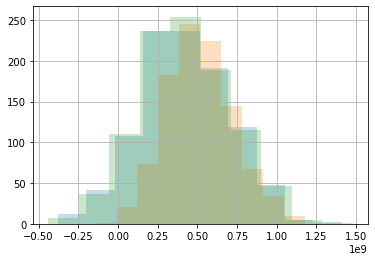

In [19]:
def get_samples(target, predictions, n):
    # выделяем n скважин по прошнозу 
    indexes = predictions.sample(500, random_state=state).index[:n]
    # print(indexes)
    return target.loc[indexes], predictions.loc[indexes]

state = np.random.RandomState(12345)
values_ = []

def butstrep(target_valid, predictions):
    values = []
    for i in range(1000):
        ''' нам надо выбрать 500 случайных значений из таргета'''
        target_500 = target_valid_[j].sample(500, replace=True, random_state=state)
        ''' берем соответствующие им по индексам предсказания'''
        predict_500 = predictions_[j][target_500.index]
        p = profit(target_500, predict_500)
        values.append(p) 
    values = pd.Series(values)
    values_.append(values)
    
    lower = values.quantile(0.025)
    mean = values.mean()
    upper = values.quantile(0.975)
    print('Регион', j+1)
    print('Риск убытков (прогноз) = {:.2%} '.format((values<0).mean()))
    print('Минимальная прибыль:', lower)
    print('Средняя прибыль:', mean)
    print('Максимальная прибыль:', upper)
    values.hist(alpha=0.25)

for j in range(3):
    butstrep(target_valid_[j], predictions_[j])

In [20]:
#ячейка ревьюера

display(pd.Series([-2, -1, 4, 5]))
'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())

0   -2
1   -1
2    4
3    5
dtype: int64

'Риск убытков = 50.00% '

### Cредняя прибыль, 95%-й доверительный интервал и риск убытков

In [21]:
for i in range(3):
    lower = values_[i].quantile(0.025)
    mean = values_[i].mean()
    upper = values_[i].quantile(0.975)
    print('Регион', i+1)
    print('Риск убытков (прогноз) = {:.2%} '.format((values_[i]<0).mean()))
    print('Минимальная прибыль:', lower)
    print('Средняя прибыль:', mean)
    print('Максимальная прибыль:', upper)

Регион 1
Риск убытков (прогноз) = 6.00% 
Минимальная прибыль: -102090094.83793654
Средняя прибыль: 425938526.91059244
Максимальная прибыль: 947976353.358369
Регион 2
Риск убытков (прогноз) = 0.30% 
Минимальная прибыль: 128123231.43308444
Средняя прибыль: 518259493.6973249
Максимальная прибыль: 953612982.0669085
Регион 3
Риск убытков (прогноз) = 6.20% 
Минимальная прибыль: -115852609.16001147
Средняя прибыль: 420194005.3440501
Максимальная прибыль: 989629939.8445739


### Выводы: 
Рисков нигде нет.

- **Регион 1** - cредняя прибыль: 2075,187,705,382.12 руб.
- **Регион 2** - cредняя прибыль: 2093,651,898,739.47 руб.
- **Регион 3** - cредняя прибыль: 2074,038,801,068.81 руб.

Как можно видеть, наилучшим регионом оказывается 2-й, т.к. его cредняя прибыль наибольшая.